Epoch 1/100
255/255 [==============================] - 38s 89ms/step - loss: 3.1935e-05
Epoch 2/100
255/255 [==============================] - 23s 89ms/step - loss: 2.9455e-06
Epoch 3/100
255/255 [==============================] - 24s 93ms/step - loss: 2.8714e-06
Epoch 4/100
255/255 [==============================] - 30s 117ms/step - loss: 2.9339e-06
Epoch 5/100
255/255 [==============================] - 30s 119ms/step - loss: 2.3119e-06
Epoch 6/100
255/255 [==============================] - 28s 108ms/step - loss: 1.9578e-06
Epoch 7/100
255/255 [==============================] - 26s 102ms/step - loss: 2.4061e-06
Epoch 8/100
255/255 [==============================] - 28s 108ms/step - loss: 1.9010e-06
Epoch 9/100
255/255 [==============================] - 22s 86ms/step - loss: 1.8380e-06
Epoch 10/100
255/255 [==============================] - 25s 100ms/step - loss: 1.6308e-06
Epoch 11/100
255/255 [==============================] - 29s 113ms/step - loss: 1.4009e-06
Epoch 12/100
255/255 [=

255/255 [==============================] - 32s 127ms/step - loss: 4.9037e-07
Epoch 93/100
255/255 [==============================] - 28s 110ms/step - loss: 5.4672e-07
Epoch 94/100
255/255 [==============================] - 27s 107ms/step - loss: 5.2357e-07
Epoch 95/100
255/255 [==============================] - 28s 109ms/step - loss: 5.4541e-07
Epoch 96/100
255/255 [==============================] - 33s 131ms/step - loss: 4.9957e-07
Epoch 97/100
255/255 [==============================] - 33s 130ms/step - loss: 5.2030e-07
Epoch 98/100
255/255 [==============================] - 32s 125ms/step - loss: 4.8342e-07
Epoch 99/100
255/255 [==============================] - 32s 125ms/step - loss: 4.8328e-07
Epoch 100/100
63/63 [==============================] - 4s 35ms/step
Root Mean Squared Error (RMSE): 2.210398563803609
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 24ms/step


C:\Users\SMIT SHAH\AppData\Local\Temp\ipykernel_25680\2556328263.py:105: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date, periods=future_data_points + 1, closed='right')


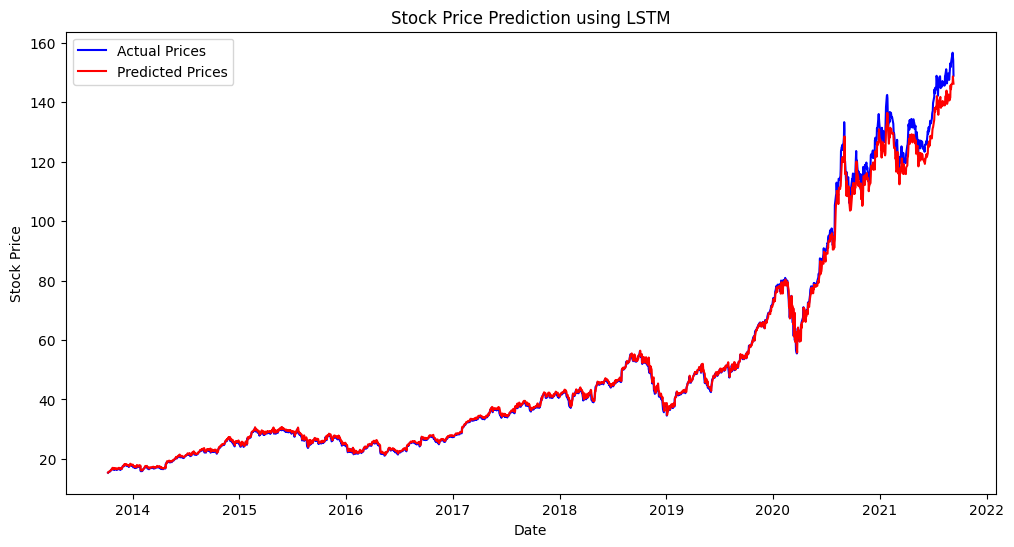

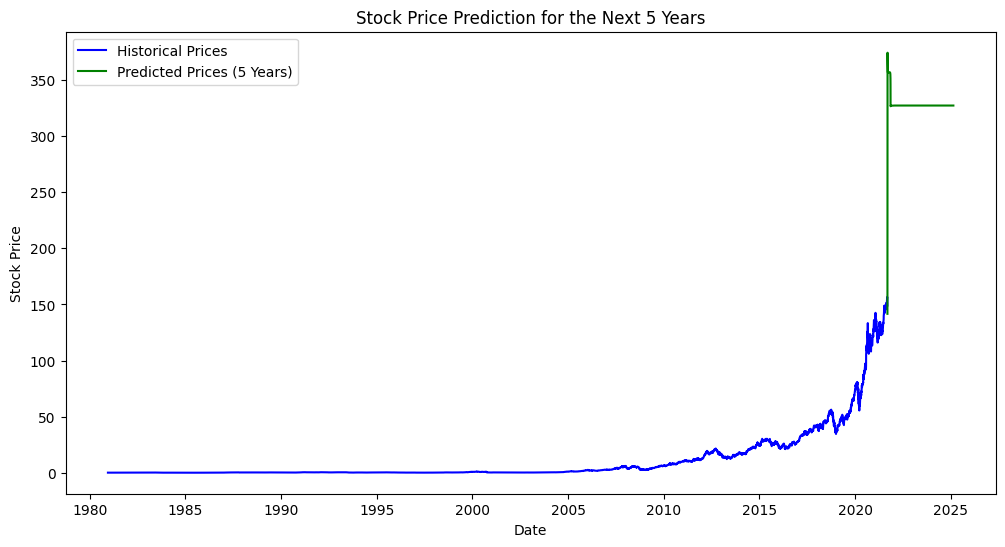

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load stock price data (you can replace 'AAPL.csv' with your own dataset)
data = pd.read_csv('AppleStockPrices.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the 'Close' prices
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
close_prices_scaled = scaler.fit_transform(close_prices)

# Define a function to create input sequences and labels
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Define hyperparameters
sequence_length = 60  # Length of input sequences
train_test_split = 0.8  # Percentage of data to use for training (the rest is for testing)
epochs = 100  # Number of training epochs
batch_size = 32  # Batch size for training

# Split data into training and testing sets
split_index = int(len(close_prices_scaled) * train_test_split)
train_data = close_prices_scaled[:split_index]
test_data = close_prices_scaled[split_index:]

# Create sequences and labels for training and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE (Root Mean Squared Error) as a measure of prediction accuracy
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Define the number of years into the future you want to predict
years_into_future = 5

# Calculate the number of future data points to predict
future_data_points = int(years_into_future * 252)  # Assuming 252 trading days in a year

# Extend the input data with the last `sequence_length` days from the original data
extended_data = np.concatenate([close_prices_scaled[-sequence_length:], close_prices_scaled], axis=0)

# Initialize an empty list to store future predictions
future_predictions = []

# Generate predictions for the next `future_data_points` days
for _ in range(future_data_points):
    # Take the last `sequence_length` days as input for prediction
    input_sequence = extended_data[-sequence_length:].reshape(1, -1, 1)

    # Make a one-step prediction
    prediction = model.predict(input_sequence)

    # Inverse transform the prediction to the original scale
    prediction = scaler.inverse_transform(prediction)

    # Append the prediction to the list of future predictions
    future_predictions.append(prediction[0, 0])

    # Update the input data for the next iteration by adding the prediction
    extended_data = np.concatenate([extended_data, prediction], axis=0)

# Create a date range for the future predictions
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_data_points + 1, closed='right')

# Plot the actual historical data and the future predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Prices', color='blue')
plt.plot(future_dates, future_predictions, label=f'Predicted Prices ({years_into_future} Years)', color='green')
plt.title('Stock Price Prediction for the Next 5 Years')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
